In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import random

In [2]:
def N(x, m, s):
    return 1/(s*(2*math.pi)**0.5) * math.e ** (-(x-m)**2/(2*s**2))

In [3]:
def get_arg(f, min_arg, max_arg, value, eps):
    min_val, max_val = f(min_arg), f(max_arg)
    while abs(max_arg - min_arg) / max_arg > eps:
        mid_arg = (min_arg + max_arg) / 2
        mid_val = f(mid_arg)
        if mid_val < value:
            min_arg = mid_arg
            min_val = mid_val
        else:
            max_arg = mid_arg
            max_val = mid_val
    return (min_arg + max_arg) / 2

In [4]:
def get_tab(f, min_arg, max_arg, points_count):
    min_val = f(min_arg)
    max_val = f(max_arg)
    d_val = (max_val - min_val) / (points_count - 1)
    x_tab = [min_arg]
    y_tab = [min_val]
    for i in range(1, points_count - 2):
        y_tab.append(min_val + d_val * i)
        x_tab.append(get_arg(f, min_arg, max_arg, y_tab[-1], 10**(-15)))
    x_tab.append(max_arg)
    y_tab.append(max_val)
    return x_tab, y_tab

In [5]:
def model_n(x, y, p):
    for i in range(1, len(x)):
        if y[i-1] <= p <= y[i]:
            return (p - y[i]) / (y[i-1]-y[i]) * x[i-1] + (p - y[i-1]) / (y[i]-y[i-1]) * x[i]

In [6]:
def M(nums):
    return sum(nums)/len(nums)

In [7]:
def D2(nums):
    mean = M(nums)
    return (sum([i**2 for i in nums]) / len(nums) - mean**2)*len(nums)/(len(nums)-1)

In [8]:
def hist(nums, a, b, intervals):
    bins = np.linspace(a, b, intervals+1)
    counts, bins = np.histogram(nums, bins)
    return list([i/len(nums) for i in counts]), bins

In [9]:
def f(x, mat, s):
    return (1 / (s * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mat) / s) ** 2)

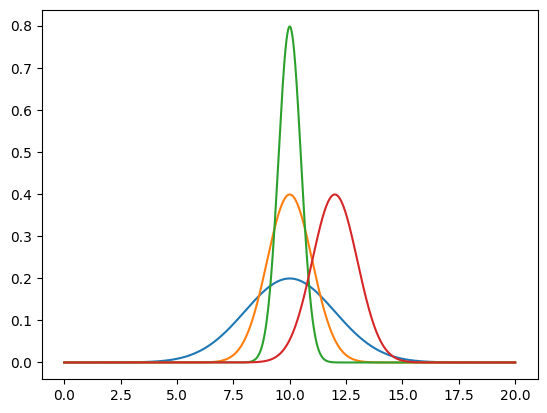

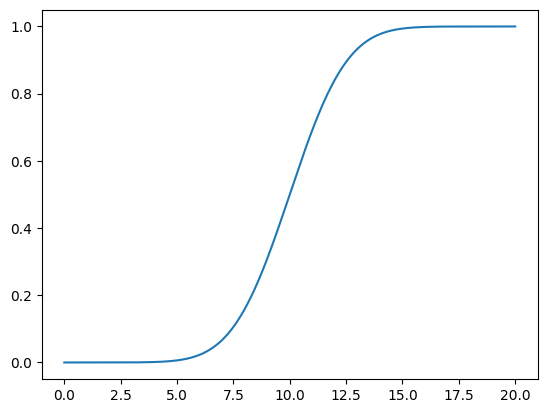

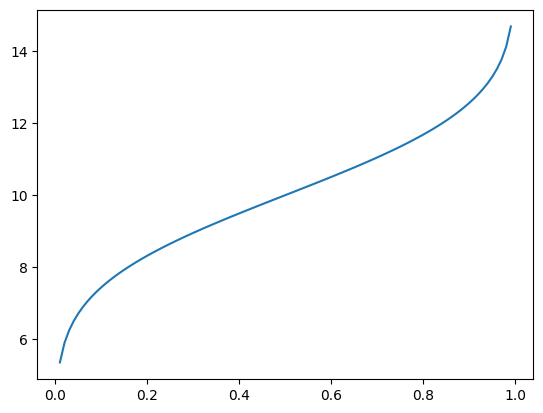

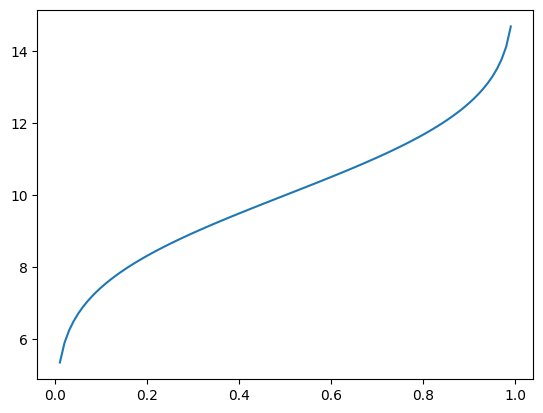

Квантиль 0.95 используя библиотеку: 13.289707253902945
Квантиль 0.95 используя обратную функцию: 13.289707257887033


In [11]:
m_array = [10, 10, 10, 12]
sigma_array = [2, 1, 0.5, 1]
x = np.linspace(0, 20, 2000)
for m, sigma in zip(m_array, sigma_array):
    y = [N(i, m, sigma) for i in x]
    plt.plot(x, y)
m = 10
sigma = 2
plt.figure()
cdf = lambda i: sts.norm.cdf(i, m, sigma)
x_tab, y_tab = get_tab(cdf, m-10, m+10, 10001)
plt.plot(x_tab, y_tab)
plt.figure()
y = [model_n(x_tab, y_tab, i) for i in x]
plt.plot(x, y)
plt.figure()
plt.plot(x, [sts.norm.ppf(i, 10, 2) for i in x])
plt.show()

quant = 0.95
print(f"Квантиль {quant} используя библиотеку: {sts.norm.ppf(quant, m, sigma)}")
print(f"Квантиль {quant} используя обратную функцию: {model_n(x_tab, y_tab, quant)}")

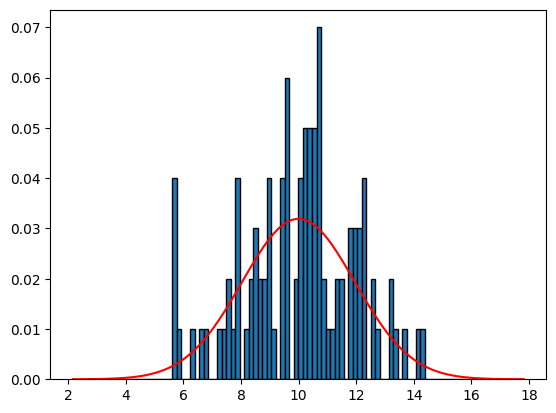

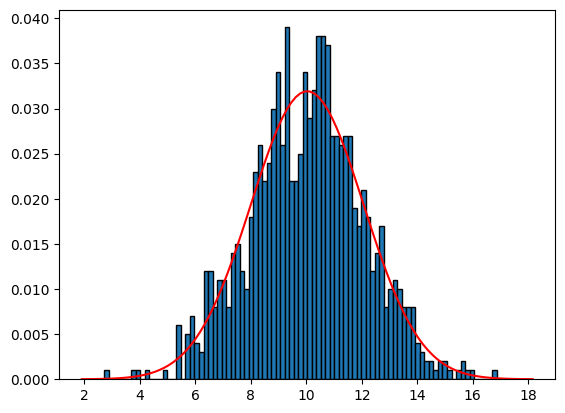

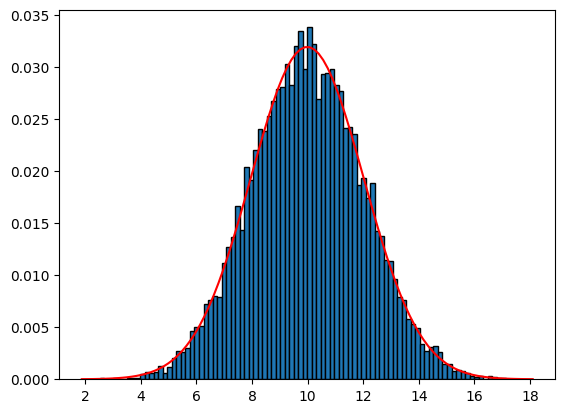

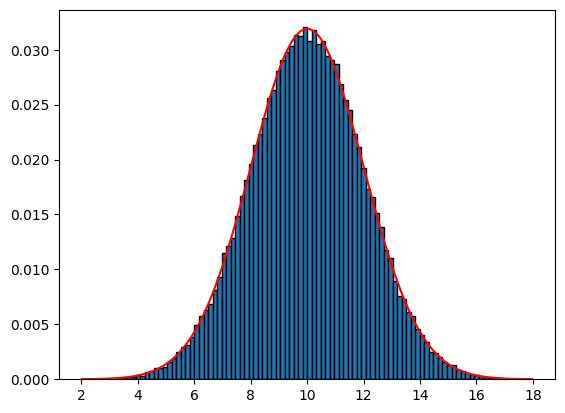

In [96]:
ammount_array = [10**2, 10**3, 10**4, 10**5]
errors = []

for ammount in ammount_array:
    nums = []
    for i in range(ammount):
        nums.append(model_n(x_tab, y_tab, random.random()))
    mid = M(nums)
    var = 4*D2(nums)**0.5
    fig, ax = plt.subplots()
    frequinces, bins = hist(nums, mid-var, mid+var, 100)
    plt.bar(bins[:-1], frequinces, align='edge', width=2*var/100, edgecolor="black")
    x = np.linspace(mid-var, mid+var, 100)

    norm_func = lambda i: f(i, M(nums), D(nums)**0.5)*(2*var/100)
    error = 0
    for i in range(len(x)):
        error += ((norm_func(x[i]) - frequinces[i]) ** 2) / 100
    errors.append(error)

    
    plt.plot(x, [f(i, M(nums), D2(nums)**0.5)*(2*var/100) for i in x], 'r')

plt.show()

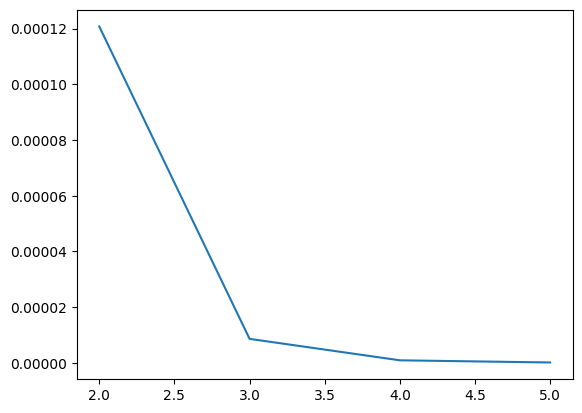

In [97]:
plt.plot([math.log(i, 10) for i in ammount_array], errors)
plt.show()

In [146]:
def M(seq):
    return sum(seq)/len(seq)

def D(seq):
    return (sum([x**2 for x in seq]) / len(seq) - M(seq) ** 2) * len(seq) / (len(seq)-1)

def S(seq):
    return D(seq) ** 0.5

In [147]:
def general_S(general):
    return (sum([(len(X)-1) * D(X) for X in general]) / (sum([len(X) for X in general]) - len(general)))**0.5

In [148]:
def grade_M_norm(x, p):
    return M(x) - sts.norm.ppf(1-p/2) * gen_S/math.sqrt(len(x)), M(x) + sts.norm.ppf(1-p/2) * gen_S/math.sqrt(len(x))

In [149]:
def grade_M_student(x, p):
    return M(x) - sts.t.ppf(1-p/2, len(x)-1) * S(x)/math.sqrt(len(x)), M(x) + sts.t.ppf(1-p/2, len(x)-1) * S(x)/math.sqrt(len(x))

In [150]:
def grade_M_chi(x, p):
    return (len(x)-1) * D(x)/(sts.chi2.ppf(1-p/2, len(x)-1)), (len(x)-1) * D(x)/(sts.chi2.ppf(p/2, len(x)-1))

In [151]:
ammount_array = [5, 10, 15, 30, 40, 50]
n = ammount_array
f = [i-1 for i in n]
sequences = []

for ammount in ammount_array:
    nums = []
    for i in range(ammount):
        nums.append(model_n(x_tab, y_tab, random.random()))
    sequences.append(nums)

In [152]:
gen_S = general_Ss(sequences)

In [153]:
Ms = []
Ds = []
Ss = []
gen_Ss = []

for seq in sequences:
    Ms.append(M(seq))
    Ds.append(D(seq))
    Ss.append(S(seq))

In [154]:
M_avg = sum(Ms)/len(Ms)
S_avg = math.sqrt((f[0] * Ss[0] ** 2 + f[1] * Ss[1] ** 2 + f[2] * Ss[2] ** 2 + f[3] * Ss[3] ** 2) / (sum(n) - 4)) 

In [155]:
norm_borders = []
t_borders = []
chi_borders_D = []
chi_borders_S = []
p = 0.05

for seq in sequences:
    low, high = grade_M_norm(seq, p)
    norm_borders.append((low, high))
    print("-------------------------------------------------------")
    print(f"Длина выборки: {len(seq)}")
    print(f"Мат. ожидание: {M(seq)}")
    print(f"Дисперсия: {D(seq)}")
    print(f"Среднее кв. отклонение: {S(seq)}")
    print(f"Оценка мат. ожидания по Нормальному закону: {low} <= M <= {high}")
    
    low, high = grade_M_student(seq, p)
    t_borders.append((low, high))
    print(f"Оценка мат. ожидания по Стьюденту: {low} <= M <= {high}")

    low, high = grade_M_chi(seq, p)
    chi_borders_D.append((low, high))
    chi_borders_S.append((math.sqrt(low), math.sqrt(high)))
    print(f"Оценка дисперсии по Хи квадрат: {math.sqrt(low)} <= S <= {math.sqrt(high)}")

-------------------------------------------------------
Длина выборки: 5
Мат. ожидание: 8.886643988730453
Дисперсия: 2.261546737480895
Среднее кв. отклонение: 1.5038439870814044
Оценка мат. ожидания по Нормальному закону: 7.124589429475578 <= M <= 10.64869854798533
Оценка мат. ожидания по Стьюденту: 7.019375051056263 <= M <= 10.753912926404643
Оценка дисперсии по Хи квадрат: 0.9010027687480842 <= S <= 4.321379361852422
-------------------------------------------------------
Длина выборки: 10
Мат. ожидание: 10.269887160342499
Дисперсия: 2.3379218859400908
Среднее кв. отклонение: 1.5290264503729458
Оценка мат. ожидания по Нормальному закону: 9.023926432672704 <= M <= 11.515847888012294
Оценка мат. ожидания по Стьюденту: 9.176087529629374 <= M <= 11.363686791055624
Оценка дисперсии по Хи квадрат: 1.0517182246169643 <= S <= 2.7914062571426097
-------------------------------------------------------
Длина выборки: 15
Мат. ожидание: 9.496572061467727
Дисперсия: 5.508903429632405
Среднее кв. о

In [156]:
chi_borders_D = []
chi_borders_S = []

for seq in sequences:
    low, high = grade_M_chi(seq, p)
    chi_borders_D.append((low, high))
    chi_borders_S.append((math.sqrt(low), math.sqrt(high)))
    print("-------------------------------------------------------")
    print(f"Длина выборки: {len(seq)}")
    print(f"Мат. ожидание: {M(seq)}")
    print(f"Дисперсия: {D(seq)}")
    print(f"Среднее кв. отклонение: {S(seq)}")
    print(f"Оценка дисперсии по Хи квадрат: {math.sqrt(low)} <= S <= {math.sqrt(high)}")

-------------------------------------------------------
Длина выборки: 5
Мат. ожидание: 8.886643988730453
Дисперсия: 2.261546737480895
Среднее кв. отклонение: 1.5038439870814044
Оценка дисперсии по Хи квадрат: 0.9010027687480842 <= S <= 4.321379361852422
-------------------------------------------------------
Длина выборки: 10
Мат. ожидание: 10.269887160342499
Дисперсия: 2.3379218859400908
Среднее кв. отклонение: 1.5290264503729458
Оценка дисперсии по Хи квадрат: 1.0517182246169643 <= S <= 2.7914062571426097
-------------------------------------------------------
Длина выборки: 15
Мат. ожидание: 9.496572061467727
Дисперсия: 5.508903429632405
Среднее кв. отклонение: 2.3471053298973197
Оценка дисперсии по Хи квадрат: 1.7183782091531683 <= S <= 3.701617497616511
-------------------------------------------------------
Длина выборки: 30
Мат. ожидание: 10.413096533416725
Дисперсия: 3.674879609475793
Среднее кв. отклонение: 1.9169975507224293
Оценка дисперсии по Хи квадрат: 1.5267101394843345

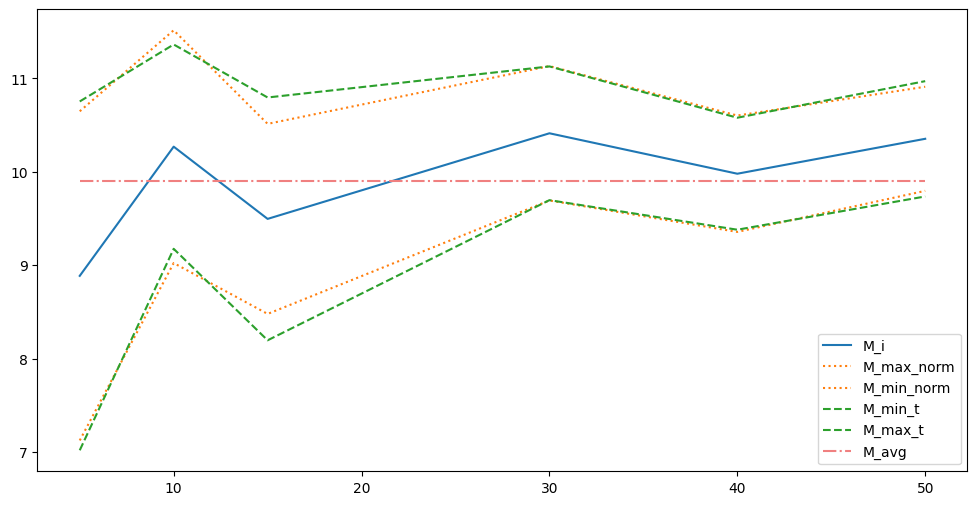

In [157]:
plt.figure(figsize=(12, 6))

plt.plot(n, Ms, linestyle='solid', label='M_i')
plt.plot(n, list([x[0] for x in norm_borders]), linestyle='dotted', color='tab:orange', label='M_max_norm')
plt.plot(n, list([x[1] for x in norm_borders]), linestyle='dotted', color='tab:orange', label='M_min_norm')

plt.plot(n, list([x[0] for x in t_borders]), linestyle='dashed', color='tab:green', label='M_min_t')
plt.plot(n, list([x[1] for x in t_borders]), linestyle='dashed', color='tab:green', label='M_max_t')

plt.plot(n, list(M_avg for _ in range(len(n))), linestyle='dashdot', label='M_avg', color='lightcoral')

plt.legend(loc='lower right')

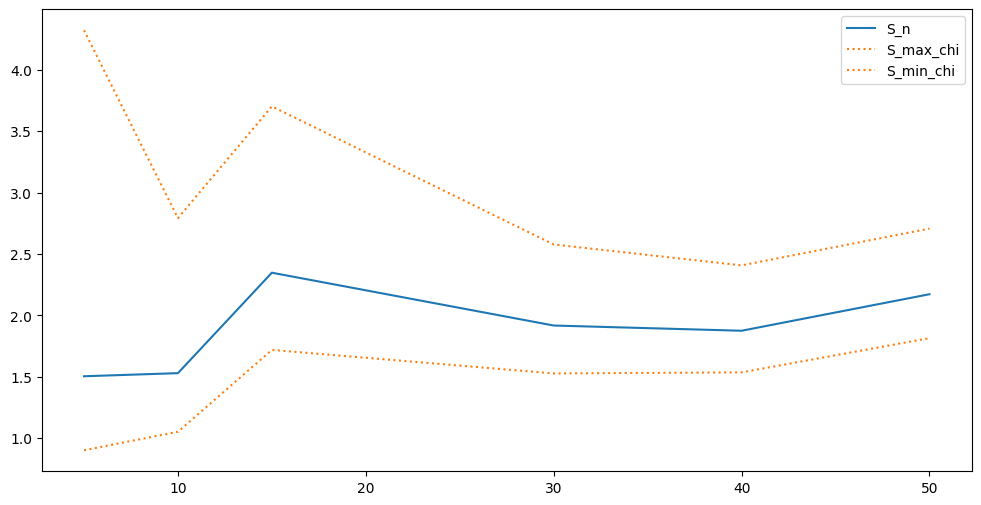

In [158]:
plt.figure(figsize=(12, 6))

plt.plot(n, Ss, linestyle='solid', label='S_n')
plt.plot(n, list([x[0] for x in chi_borders_S]), linestyle='dotted', color='tab:orange', label='S_max_chi')
plt.plot(n, list([x[1] for x in chi_borders_S]), linestyle='dotted', color='tab:orange', label='S_min_chi')

#plt.plot(n, list(S_avg for _ in range(len(n))), linestyle='dashdot', label='S_avg', color='lightcoral')

plt.legend(loc='upper right')